## Analyzing google_search_history script

In [1]:
from google_search_history import process
from tests import test_google_search_history, simulation_google_search_history
from pathlib import Path
import pandas as pd
import io

### 1. Testing functionality of script

In [2]:
test_google_search_history.test_extract() # if not AssertionError: outcome is as expected

In [3]:
test_google_search_history.test_process() # if not AssertionError: outcome is as expected

### 2. Use case: simulated Google Takeout data

In [4]:
# # Create seeded simulation data
# file_data = POC_google_search_history.BrowserHistory(
#         n=1000, site_diff=0.15, time_diff=True, seed=0, fake=False)
# POC_google_search_history.__createZip(file_data)

In [5]:
data = Path('tests/data/takeout.zip') # Enter path to takeout.zip data
output = process(data)

In [6]:
print(output['summary'])

 
    With this research we want to invesitgate how our news consumption behavior has changed during/after the COVID-19 related 
    curfew. To examine this, we looked at your Google Search History. First, we divided your browser history into three 
    periods: before the start of the curfew (before 2021-01-23 21:00:00), during the curfew (between 2021-01-23 21:00:00 and 2021-04-28 04:30:00) 
    and post curfew (after 2021-04-28 04:30:00). For each period, we counted how many times you searched for a news website 
    versus any another type of website (i.e., news/other). While counting, we also took the time of day 
    (i.e., morning/afternoon/evening/night) into account. 
     
    read_files: BrowserHistory.json
    Your earliest web search was on 2020-10-22 22:55:00, 
    The Dutch curfew took place between 2021-01-23 21:00:00 and 2021-04-28 04:30:00,
    Your latest web search was on 2021-07-22 15:39:00.
    


In [7]:
overview = output['data_frames'][0]
overview

,Curfew,Website,Time,Searches
0,before,news,morning,5
1,before,news,afternoon,13
2,before,news,evening,7
3,before,news,night,9
4,before,other,morning,53
5,before,other,afternoon,43
6,before,other,evening,47
7,before,other,night,45
8,during,news,morning,9
9,during,news,afternoon,13


In [8]:
curf_web = overview.groupby(['Website']).sum()
curf_web['%'] = curf_web.apply(lambda x: x/x.sum())
curf_web

,Searches,%
Website,,
news,130,0.192593
other,545,0.807407


In [9]:
curf_web = overview.groupby(['Curfew', 'Website']).sum()
curf_web['%'] = curf_web.groupby(level=0).apply(lambda x: x/x.sum())
curf_web

Searches         %
Curfew Website                    
before news           34  0.153153
       other         188  0.846847
during news           65  0.280172
       other         167  0.719828
post   news           31  0.140271
       other         190  0.859729

In [10]:
curf_time_web = overview.groupby(['Curfew', 'Time', 'Website']).sum()
curf_time_web['%'] = curf_time_web.groupby(['Curfew', 'Time']).apply(lambda x: x/x.sum())
curf_time_web

Searches         %
Curfew Time      Website                    
before afternoon news           13  0.232143
                 other          43  0.767857
       evening   news            7  0.129630
                 other          47  0.870370
       morning   news            5  0.086207
                 other          53  0.913793
       night     news            9  0.166667
                 other          45  0.833333
during afternoon news           13  0.309524
                 other          29  0.690476
       evening   news           29  0.287129
                 other          72  0.712871
       morning   news            9  0.219512
                 other          32  0.780488
       night     news           14  0.291667
                 other          34  0.708333
post   afternoon news           10  0.188679
                 other          43  0.811321
       evening   news            6  0.120000
                 other          44  0.880000
       morning   news            6  0.103448
                 other          52  0.896552
       night     news            9  0.150000
                 other          51  0.850000

<AxesSubplot:xlabel='Website', ylabel='Searches'>

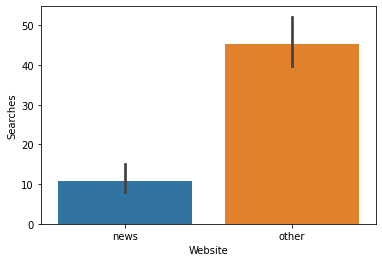

In [11]:
import seaborn as sns
sns.barplot(x='Website', y='Searches', data=overview)

### Browser history at different moments 
#### Number of news vs. other searches before, during and after the curfew

<AxesSubplot:xlabel='Curfew', ylabel='Searches'>

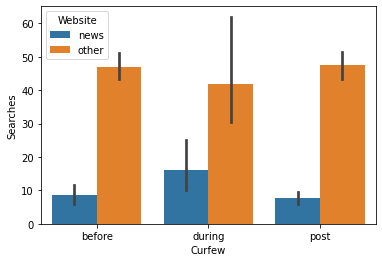

In [12]:
sns.barplot(x='Curfew', y='Searches', hue='Website', data=overview)

### Browser history at different times of the day
#### Number of news vs. other searches at different times before the curfew

<AxesSubplot:xlabel='Time', ylabel='Searches'>

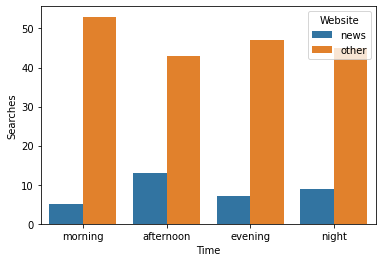

In [13]:
sns.barplot(x='Time', y='Searches', hue='Website', data=overview[overview['Curfew'] == 'before'])

#### Number of news vs. other searches at different times during the curfew

<AxesSubplot:xlabel='Time', ylabel='Searches'>

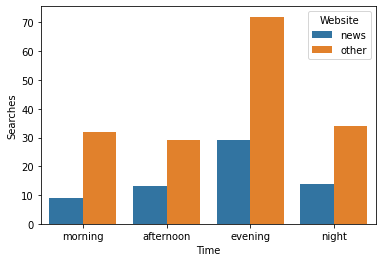

In [14]:
sns.barplot(x='Time', y='Searches', hue='Website', data=overview[overview['Curfew'] == 'during'])

#### Number of news vs. other searches at different times after the curfew

<AxesSubplot:xlabel='Time', ylabel='Searches'>

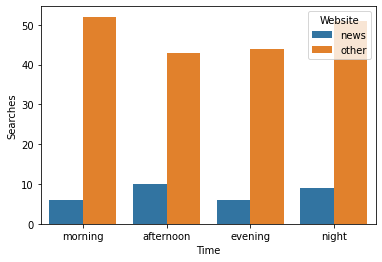

In [15]:
sns.barplot(x='Time', y='Searches', hue='Website', data=overview[overview['Curfew'] == 'post'])